# Librosa: Music in Python

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

import IPython.display
import librosa
import librosa.display

### Loading the Songs

Librosa has a simple function to import an audio file, using `librosa.load()` to read most audio filetypes.
This converts the audio file into a tuple containing 2 items: a timeseries representing the audio, and the sample rate. The sample rate is also an optional perameter for `load` with a default of 22050, measured in Hz.

In [3]:
audio_paths = ['Rudie_Cant_Fail.m4a',
               'Rolling_in_the_Deep.m4a',
               'What_About_Love.m4a']#librosa.util.example_audio_file()
names = ["Rudie Can't Fail by The Clash",
         "Rolling in the Deep by Adele",
         "What About Love by Heart"]

songs = []

for i,path in enumerate(audio_paths):
    a, sr = librosa.load('songs/' + path, sr=44100)
    songs.append((a,sr,names[i]))


### Mel Power Spectrograms



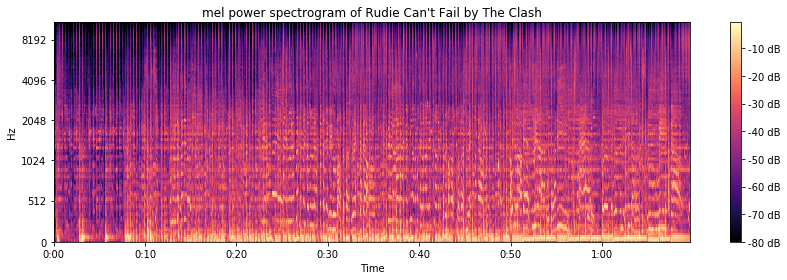

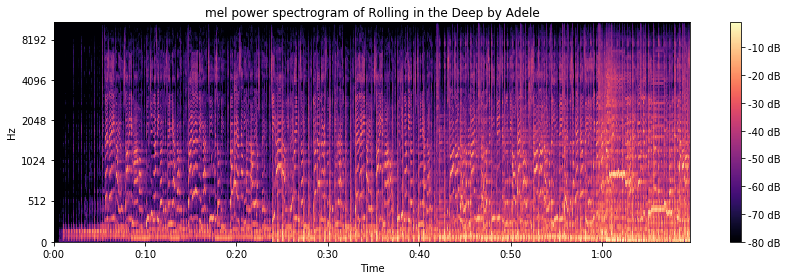

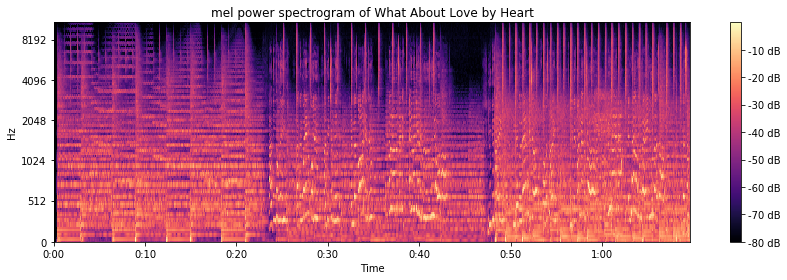

In [4]:
logs = []

for i,song in enumerate(songs):
    y,sr,title = song
    # Let's make and display a mel-scaled power (energy-squared) spectrogram
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
    # Convert to log scale (dB). We'll use the peak power (max) as reference.
    log_S = librosa.power_to_db(S, ref=np.max)
    logs.append(log_S)
    
    ls = log_S[:,:6000]
    
    plt.figure(figsize=(12,4))

    # Display the spectrogram on a mel scale
    # sample rate and hop length parameters are used to render the time axis
    librosa.display.specshow(ls, sr=sr, hop_length=512 ,x_axis='time', y_axis='mel')

    plt.title("mel power spectrogram of " + title)
    plt.colorbar(format='%+02.0f dB')
    plt.tight_layout()
    plt.show()

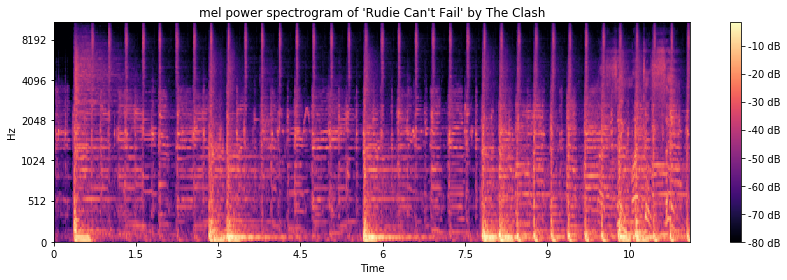

In [37]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

log_half = log_S[:,:3000]

plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_half, sr=sr, hop_length=512 ,x_axis='time', y_axis='mel')

plt.title("mel power spectrogram of 'Rudie Can't Fail' by The Clash")
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

In [35]:
8996/2

4498.0

In [119]:
harmonics = []
percussives = []

for song in songs:
    h, p = librosa.effects.hpss(song[0])
    harmonics.append(h)
    percussives.append(p)

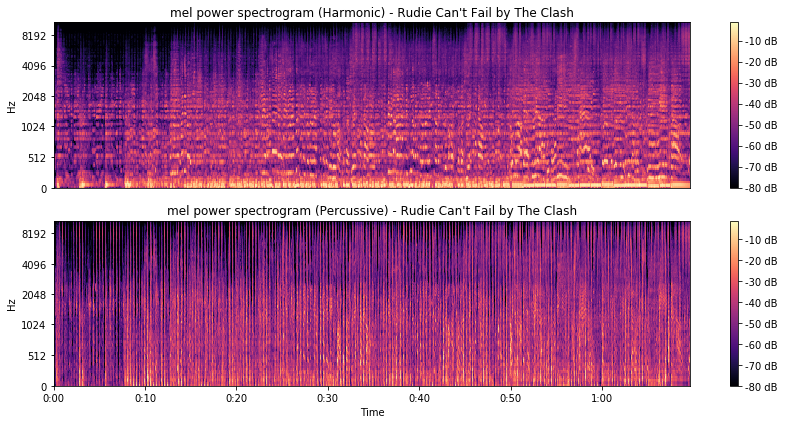

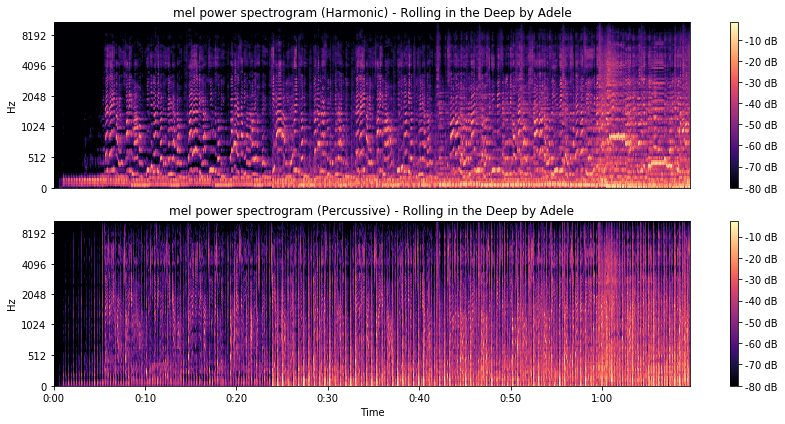

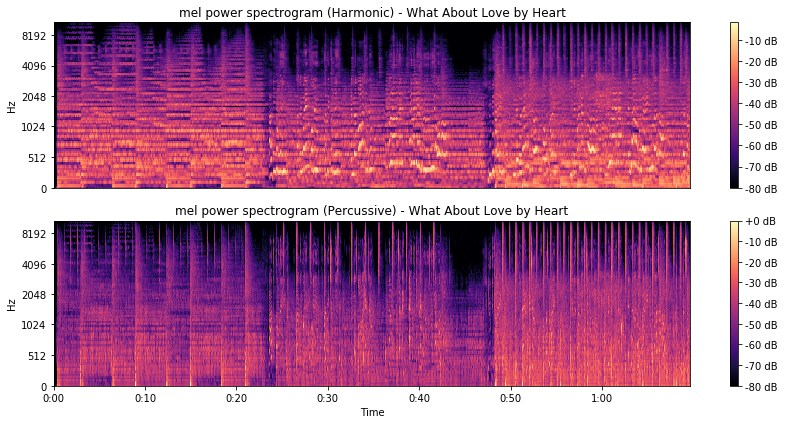

In [120]:
for i,song in enumerate(songs):
    y,sr,title = song
    y_harmonic = harmonics[i]
    y_percussive = percussives[i]
    # Let's make and display a mel-scaled power (energy-squared) spectrogram
    S_harmonic   = librosa.feature.melspectrogram(y_harmonic, sr=sr)
    S_percussive = librosa.feature.melspectrogram(y_percussive, sr=sr)

    # Convert to log scale (dB). We'll use the peak power as reference.
    log_Sh = librosa.power_to_db(S_harmonic, ref=np.max)
    log_Sp = librosa.power_to_db(S_percussive, ref=np.max)
    lh = log_Sh[:,:6000]
    lp = log_Sp[:,:6000]

    plt.figure(figsize=(12,6))
    plt.subplot(2,1,1)
    librosa.display.specshow(lh, sr=sr, y_axis='mel')
    plt.title('mel power spectrogram (Harmonic) - ' + title)
    plt.colorbar(format='%+02.0f dB')
    plt.subplot(2,1,2)
    librosa.display.specshow(lp, sr=sr, x_axis='time', y_axis='mel')
    plt.title('mel power spectrogram (Percussive) - ' + title)
    plt.colorbar(format='%+02.0f dB')
    plt.tight_layout()
    plt.show()

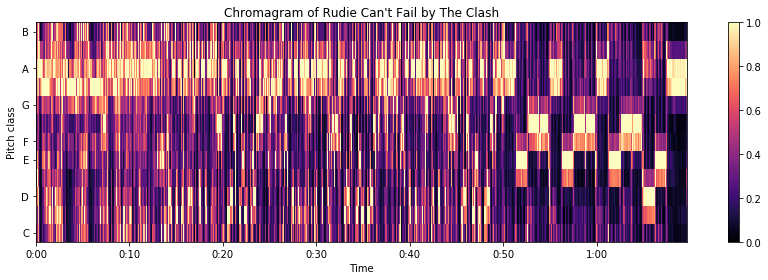

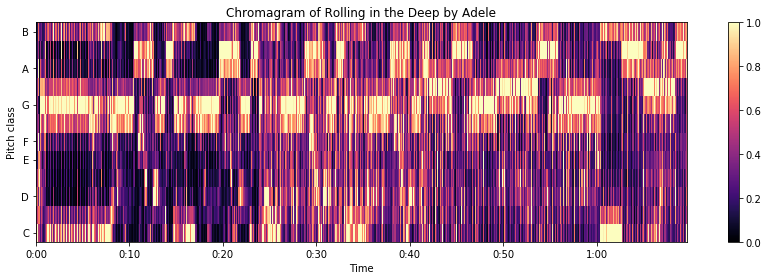

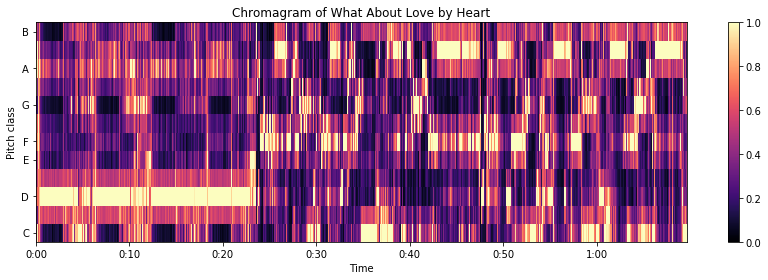

In [114]:
for i, song in enumerate(songs):
    y,sr,title = song
    y_harmonic = harmonics[i]
    y_percussive = percussives[i]
    C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)

    C_new = C[:,:6000]
    # Display the chromagram: the energy in each chromatic pitch class as a function of time
    # To make sure that the colors span the full range of chroma values, set vmin and vmax
    plt.figure(figsize=(12,4))
    librosa.display.specshow(C_new, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)

    plt.title('Chromagram of ' + title)
    plt.colorbar()
    plt.tight_layout()
    plt.show()

In [38]:
C.shape

(12, 17993)

<Figure size 864x288 with 0 Axes>

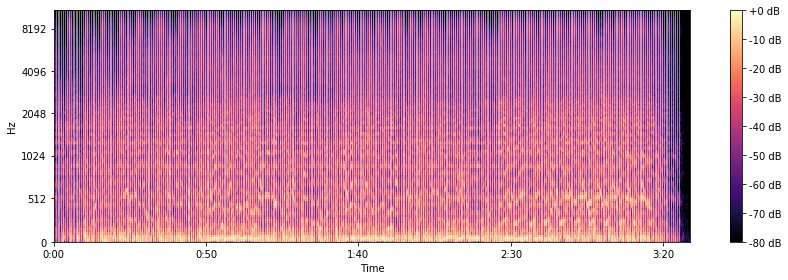

<Figure size 864x288 with 0 Axes>

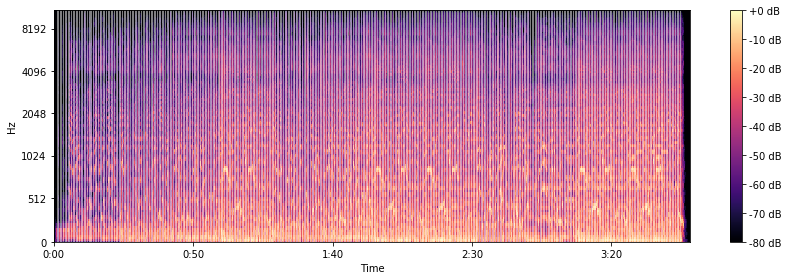

<Figure size 864x288 with 0 Axes>

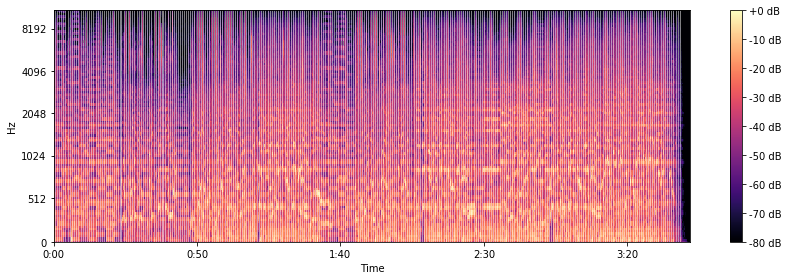

In [108]:
for i,song in enumerate(songs):
    y,sr,title = songs[i]

    plt.figure(figsize=(12, 4))
    tempo, beats = librosa.beat.beat_track(y=percussives[i], sr=sr)

        # Let's re-draw the spectrogram, but this time, overlay the detected beats
    plt.figure(figsize=(12,4))
    librosa.display.specshow(logs[i], sr=sr, x_axis='time', y_axis='mel')

        # Let's draw transparent lines over the beat frames
    plt.vlines(librosa.frames_to_time(beats, sr=sr),
                   1, sr * 0.25,
                   colors='white', linestyles='-', linewidth=1, alpha=0.5)

    plt.axis('tight')
    plt.colorbar(format='%+02.0f dB')
    plt.tight_layout()
    plt.show();

In [96]:
#librosa.frames_to_time(beats)


97.50884433962264